In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
import time
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

### Exploratory Analysis
Let's first read in the csv file and do some preliminary exploratory analysis

In [31]:
df = pd.read_csv('Skyserver_SQL2_27_2018 6_51_39 PM.csv')
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [32]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
objid        10000 non-null float64
ra           10000 non-null float64
dec          10000 non-null float64
u            10000 non-null float64
g            10000 non-null float64
r            10000 non-null float64
i            10000 non-null float64
z            10000 non-null float64
run          10000 non-null int64
rerun        10000 non-null int64
camcol       10000 non-null int64
field        10000 non-null int64
specobjid    10000 non-null float64
class        10000 non-null object
redshift     10000 non-null float64
plate        10000 non-null int64
mjd          10000 non-null int64
fiberid      10000 non-null int64
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


No missing values! So thankfully, we won't have to think about doing any kind of imputing.
We can also drop the objid and specobjid features, since these are just identifiers for the columns from the original databases. Additionally, the run, rerun, camcol, and field features only refer to specifics of the telescope, and should in no way be correlated with the classes. We will therefore drop them as well. More information can be found at http://www.sdss3.org/dr9/imaging/imaging_basics.php.

In [34]:
df.drop(['objid', 'specobjid', 'run', 'rerun', 'camcol', 'field'], axis=1, inplace=True)

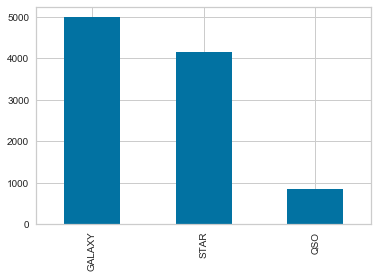

In [35]:
df['class'].value_counts().plot(kind='bar')

In [36]:
df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

The classes are unbalanced, but it doesn't seem to be too bad. We'll proceed without using any balancing techniques, and then return to this idea if the final performance metrics don't look good.

We'll now try to get a sense of which of the remaining feautres will potentially be the most useful for separating out the classes. To do this, we'll simply look at the distributions of the features for each of the classes.

In [37]:
def plot_features(df, feature):
    fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(11,4), sharey=False, sharex=True)
    sns.distplot(df[df['class'] == 'STAR'][feature], bins=30, ax=axs1)
    sns.distplot(df[df['class'] == 'GALAXY'][feature], bins=30, ax=axs2)
    sns.distplot(df[df['class'] == 'QSO'][feature], bins=30, ax=axs3)
    axs1.set_title('Star')
    axs2.set_title('Galaxy')
    axs3.set_title('Qasar')
    axs1.set_xlabel('')
    axs2.set_xlabel('')
    axs3.set_xlabel('')
    fig.text(0.5, 0, 'Redshift', ha='center')
    fig.tight_layout()

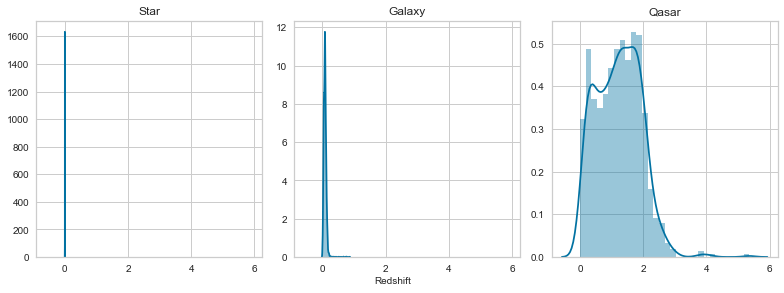

In [38]:
plot_features(df, 'redshift')
plt.savefig('redshifts.png')

class is not numerical


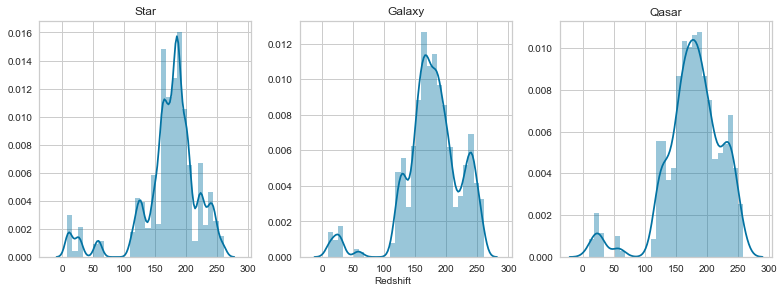

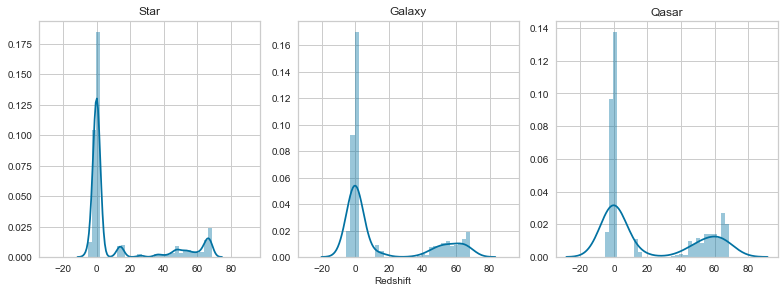

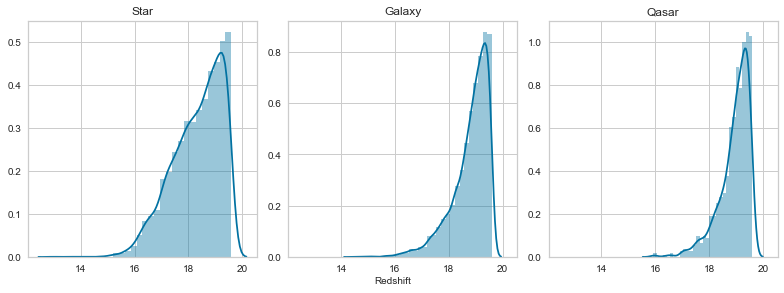

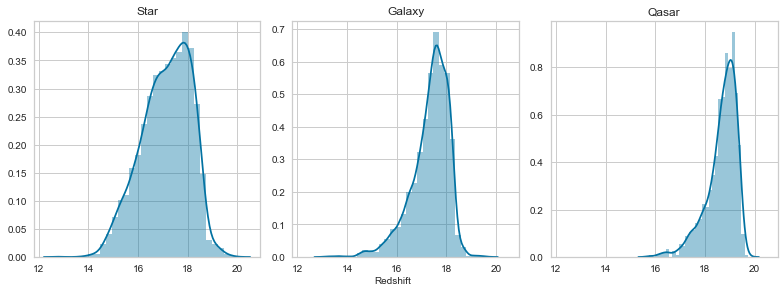

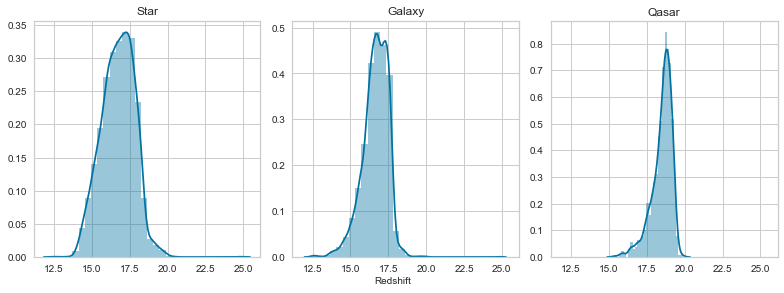

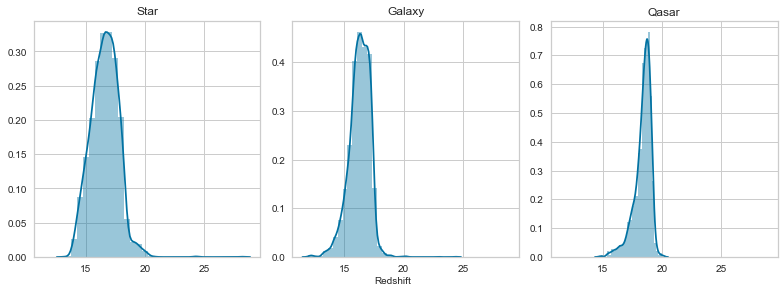

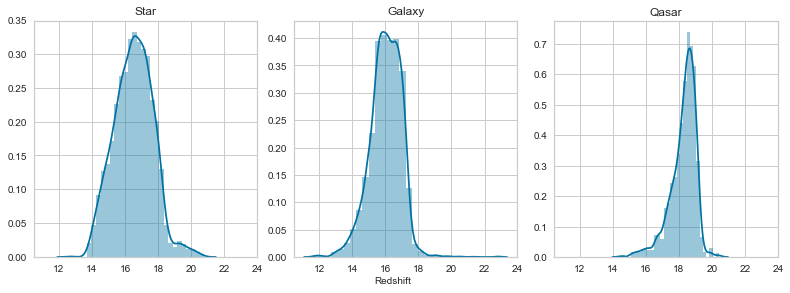

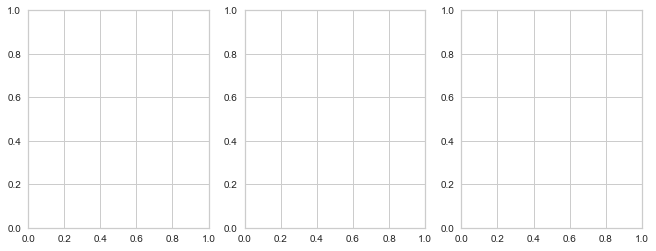

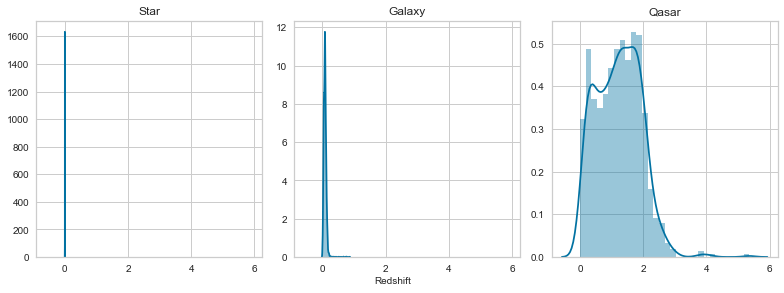

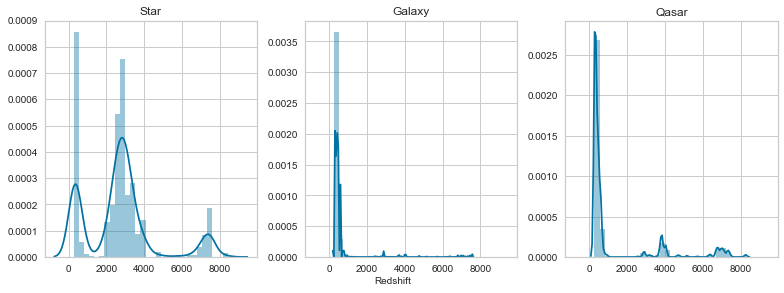

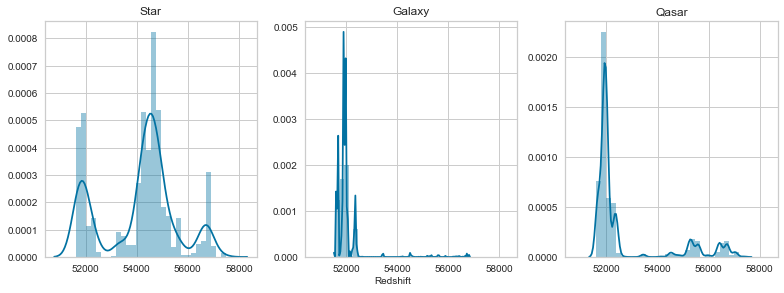

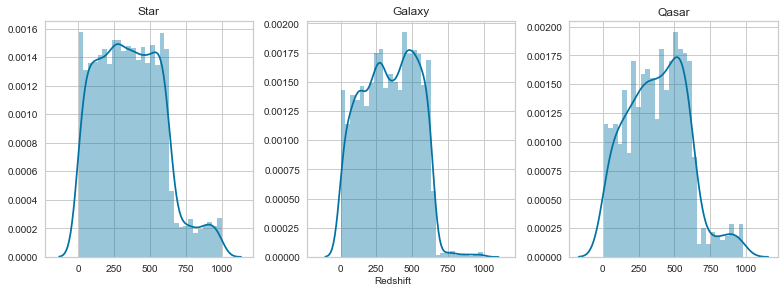

In [39]:
for feature in df.columns.values:
    try:
        plot_features(df, feature)
    except:
        print(f'{feature} is not numerical')

We can see right away that pixel values tend to be (1) higher and (2) more localized for galaxies and qasars than for stars. Qasars are clearly the most distinct. However, This could also be an anomaly due to the fact that our qasar class is underrepesented. Qasars and galaxies are also significantly more redshifted than stars. This makes sense, as the expansion of the universe esseentially makes the redshift a quantifier of how far away an object is from our observation point. Because our own galaxy has numerous stars, and they are relatively close to us, the peak at a redshift of zero makes sense. Qasars, being some of the oldest objects in our universe, will naturally be further away from Earth.

### Feature Engineering
Now that we've done some EDA, we'll engineer our features and prepare the data for modelling.

In [83]:
# Splitting The data into target and predictors
y = df['class']
X = df.drop('class', axis=1)
print(X.shape, y.shape)

(10000, 11) (10000,)


In [84]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

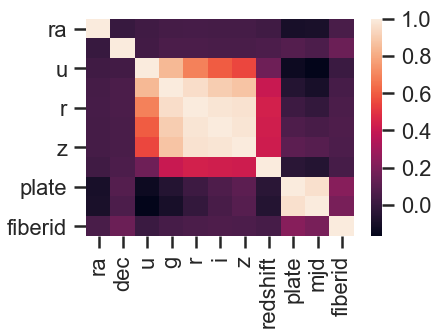

In [85]:
# Investigating correlations

sns.heatmap(X.corr())

The u, g, r, i, and z pixel data is all correlated. Let's take a closer look.

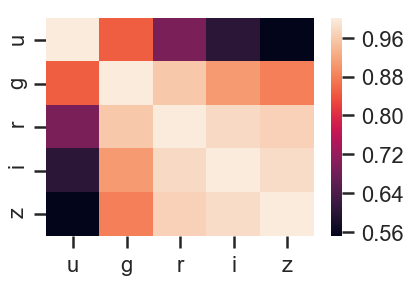

In [86]:
sns.heatmap(X[['u', 'g', 'r', 'i', 'z']].corr())

It looks like we should be able to reduce some of the dimensionality here. In a little bit we'll investigate just how many principal components we actually Need.

First, Let's return to the plate and mjd columns.

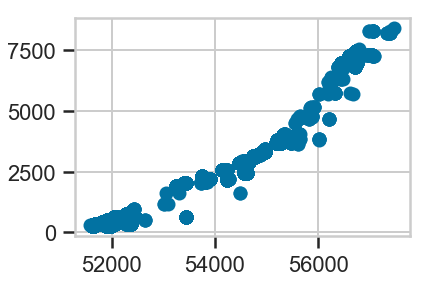

In [87]:
plt.scatter(X.mjd, X.plate)

It should be okay to just drop the mjd column

In [88]:
X.drop('mjd', axis=1, inplace=True)

In [89]:
# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.20, random_state=42)

In [90]:
# Standard scaling for PCA
ss = StandardScaler()
ss.fit(X_train)
X_train_ss = pd.DataFrame(ss.transform(X_train), columns=X.columns)
X_test_ss = pd.DataFrame(ss.transform(X_test), columns=X.columns)

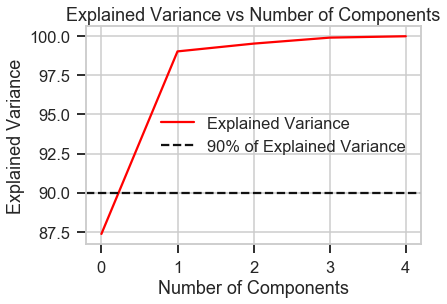

In [94]:
# PCA fitting and transforming
sns.set_context('talk')
pca = PCA()
pca.fit(X_train_ss[['u', 'g', 'r', 'i', 'z']])
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(6,4))
plt.plot(d, cumsum, color='red', label = 'Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.ylabel('Explained Variance')
plt.xlabel('Number of Components')
plt.xticks([0,1,2,3,4])
plt.axhline(y = 90, color='k', linestyle='--', label = '90% of Explained Variance')
plt.legend(loc='best');

# X = pd.concat((X, pd.DataFrame(ugriz)), axis=1)
# X.rename({0: 'PCA_1', 1: 'PCA_2', 2: 'PCA_3'}, axis=1, inplace = True)
# X.drop(['u', 'g', 'r', 'i', 'z'], axis=1, inplace=True)


In this above plot, we can see that we're explaining 99% of the variance with just a single principal component. So, in the end we'll end up condensing our ugriz bands into just one feature.

In [95]:
pca = PCA(n_components=3)
pca.fit(X_train_ss)
ugriz_train = pca.transform(X_train_ss)
ugriz_test = pca.transform(X_test_ss)

X_train_ss = pd.concat((X_train_ss, pd.DataFrame(ugriz_train)), axis=1)
X_train_ss.rename({0: 'PCA_1', 1: 'PCA_2', 2: 'PCA_3'}, axis=1, inplace = True)
X_train_ss.drop(['u', 'g', 'r', 'i', 'z'], axis=1, inplace=True)

X_test_ss = pd.concat((X_test_ss, pd.DataFrame(ugriz_test)), axis=1)
X_test_ss.rename({0: 'PCA_1', 1: 'PCA_2', 2: 'PCA_3'}, axis=1, inplace = True)
X_test_ss.drop(['u', 'g', 'r', 'i', 'z'], axis=1, inplace=True)

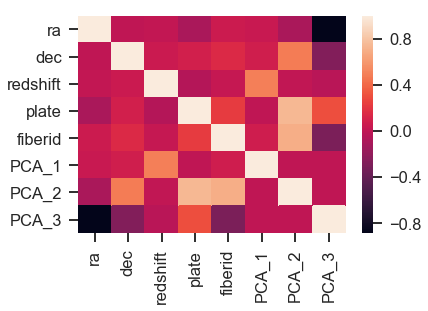

In [96]:
sns.heatmap(X_train_ss.corr())

### Modelling

In this section we'll apply several different models. In the end, we'll analyze the different metrics and then select the best model based one performance. We'll also have to keep in mind which metrics are most important based on the questions we want to answer. More discussion on this later.

In [97]:
models = {'knn': KNeighborsClassifier(),
          'svc': SVC(),
          'dtc': DecisionTreeClassifier(),
          'rfc': RandomForestClassifier(),
          'gnb': GaussianNB(),
          'cnb': ComplementNB(),
          'xgb': XGBClassifier()
         }

#### KNN

In [141]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
acc_knn = accuracy_score(y_test, preds)

print(f"Prediction accuracy is: {acc_knn}")

Prediction accuracy is: 0.93


#### SVM

In [142]:
svc = SVC()
svc.fit(X_train, y_train)
preds = svc.predict(X_test)
acc_svc = accuracy_score(y_test, preds)

print(f"Prediction accuracy is: {acc_svc}")

Prediction accuracy is: 0.9444


#### Decision Tree

In [143]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
preds = dtc.predict(X_test)
acc_dtc = accuracy_score(y_test, preds)
recall_dtc = recall_score(y_test, preds, average='weighted')
print(recall_dtc)
print(f"Prediction accuracy is: {acc_dtc}")

0.9908
Prediction accuracy is: 0.9908


#### Random Forest

In [144]:
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)
preds = rfc.predict(X_test)
acc_rfc = accuracy_score(y_test, preds)
recall_rfc = recall_score(y_test, preds, average='weighted')
print(recall_rfc)
print(f"Prediction accuracy is: {acc_rfc}")

0.9928
Prediction accuracy is: 0.9928


#### XGBoost

In [98]:
sns.set_context('poster')

xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train_ss, y_train)
y_pred_xgb = xgb.predict(X_test_ss)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(acc_xgb)
# labels = {'GALAXY': 'Galaxy',
#           'QSO': 'Qasar',
#           'STAR': 'Star'}

# fig, ax = plt.subplots(figsize=(13,7))

# cm = ConfusionMatrix(xgb, encoder=labels)
# cm.fit(X_train, y_train)
# cm.score(X_test, y_test)
# plt.xticks(rotation = 0)
# plt.title('Confusion Matrix')

# cm.show(ax=ax)
# fig.tight_layout()
# fig.savefig('xgb_conf_matrix.png')
#print(classification_report(y_test, y_pred))

0.9905


Perhaps not to anyone's surprise, XGBoost is performing the best here. Let's see if we can eek a bit more performance by applying SMOTE to balance out the classes.

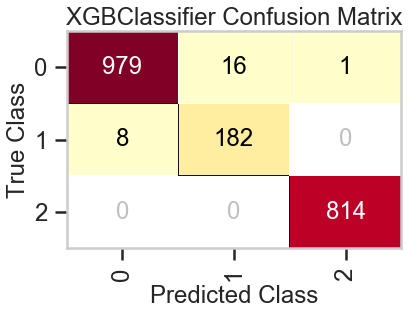

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       996
           1       0.92      0.96      0.94       190
           2       1.00      1.00      1.00       814

    accuracy                           0.99      2000
   macro avg       0.97      0.98      0.97      2000
weighted avg       0.99      0.99      0.99      2000



In [101]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_sample(X_train_ss, y_train)

xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train_sm, y_train_sm)
y_pred_sm = xgb.predict(X_test_ss)
acc_xgb = accuracy_score(y_test, y_pred_sm)

cm = ConfusionMatrix(xgb)
cm.fit(X_train_sm, y_train_sm)
cm.score(X_test_ss, y_test)
cm.show()

print(classification_report(y_test, y_pred_sm))

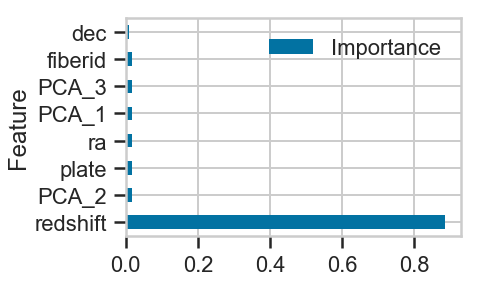

In [100]:
importances = pd.DataFrame({
    'Feature': X_train_ss.columns,
    'Importance': xgb.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.set_index('Feature')
importances.plot(kind='barh')

In [202]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_xgb, )

ValueError: multi_class must be in ('ovo', 'ovr')